In [ ]:
#re-check and fill the missing cells 
#checked and ideally modified

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
data = tf.keras.datasets.fashion_mnist

In [ ]:
#...IT RETURNS TWO TUPLE --TRAIN & --TEST.
[xtrain, ytrain],[xtest,ytest] = data.load_data()

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
#60k images to train

(60000, 28, 28)
(60000,)


In [ ]:
print(xtest.shape)
print(ytest.shape)

#10k images to test

(10000, 28, 28)
(10000,)


In [ ]:
np.unique(xtrain)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
class_names=['T-shirt/top','Trouser','Pullovers','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

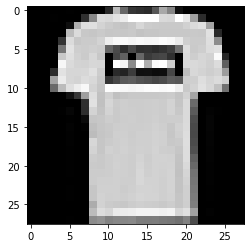

In [ ]:
plt.imshow(xtrain[1], cmap='gray')

In [ ]:
#...max range = 255 to convert data to binary format
#...scaled data into 0-1.
xtrain = xtrain/255.0
xtest = xtest/250.0


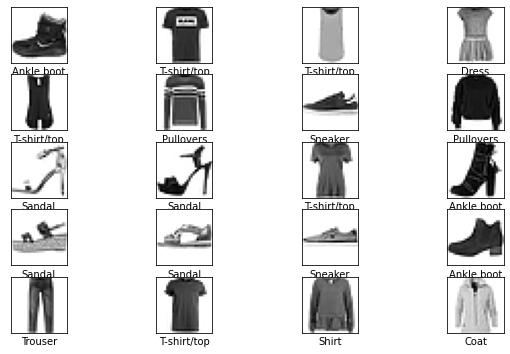

In [ ]:
#...to display first 20 images  we are doing this

fig = plt.figure(figsize=[10,6])

for i in range(20):
  plt.subplot(5,4,i+1)
  plt.imshow(xtrain[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[ytrain[i]])
  plt.xticks([])
  plt.yticks([])

In [ ]:
#...create a Neural Network for Multi-classifiaction

model = tf.keras.models.Sequential()
#...input layer
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(10))
#...to get probabilities...for softmax fuction ... logits=True
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics='accuracy')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(xtrain, ytrain, epochs=25)

Epoch 1/25
6000/6000 [==============================] - 12s 2ms/step - loss: 0.4815 - accuracy: 0.8277
Epoch 2/25
6000/6000 [==============================] - 11s 2ms/step - loss: 0.3695 - accuracy: 0.8648
Epoch 3/25
6000/6000 [==============================] - 11s 2ms/step - loss: 0.3341 - accuracy: 0.8761
Epoch 4/25
6000/6000 [==============================] - 11s 2ms/step - loss: 0.3099 - accuracy: 0.8864
Epoch 5/25
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2956 - accuracy: 0.8904
Epoch 6/25
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2818 - accuracy: 0.8955
Epoch 7/25
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2709 - accuracy: 0.8995
Epoch 8/25
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2594 - accuracy: 0.9031
Epoch 9/25
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2531 - accuracy: 0.9060
Epoch 10/25
6000/6000 [==============================] - 12s 2ms/step - l

In [ ]:
loss, acc=model.evaluate(xtrain, ytrain)
print("Training Accuracy is {} and Training Loss is{}".format(acc, loss))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1547 - accuracy: 0.9419
Training Accuracy is 0.9419000148773193 and Training Loss is0.15472689270973206


In [ ]:
loss, acc=model.evaluate(xtest, ytest)
print("Training Accuracy is {} and Training Loss is{}".format(acc, loss))

313/313 [==============================] - 1s 2ms/step - loss: 0.4224 - accuracy: 0.8902
Training Accuracy is 0.8902000188827515 and Training Loss is0.42241230607032776


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) 
ypred = probability_model.predict(xtest)

In [ ]:
#...cotains list of probabilities...
ypred[0]

array([9.5645757e-19, 6.7708998e-19, 9.7690677e-22, 1.8625029e-16,
       7.1131127e-17, 3.9970099e-10, 5.4927436e-20, 4.9327158e-05,
       2.3800406e-18, 9.9995065e-01], dtype=float32)

In [ ]:
# argmax gives index of max value
#both values should be same
np.argmax(ypred[0])

9

In [ ]:
class_names[np.argmax(ypred[0])]

'Ankle boot'

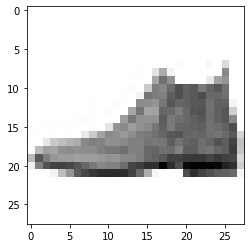

In [ ]:
plt.imshow(xtest[0], cmap=plt.cm.binary)

In [ ]:
#...plot image with label

def plot_image(i, ypred, xtest, ytest):
  img = xtest[i]
  actual = ytest[i]
  predicted = np.argmax(ypred[i])
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])

  if actual == predicted:
    color='green'
  else:
    color='r'

  plt.xlabel("{} with prob {:.2f}%".format(class_names[predicted], 100*np.max(ypred[i])), color=color)

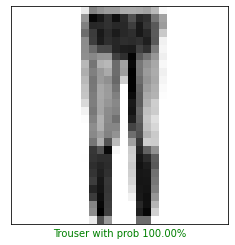

In [ ]:
plot_image(3, ypred,xtest,ytest)

In [ ]:
#automating the process 

def plot_prob(i,ypred,ytest):
  predicted=np.argmax(ypred[i])
  actual=ytest[i]
  barplot=plt.bar(range(10),ypred[i])
  plt.xticks(range(10))
  barplot[predicted].set_color('r')
  barplot[actual].set_color('g')

In [ ]:
plot_prob(7416,ypred,ytest)

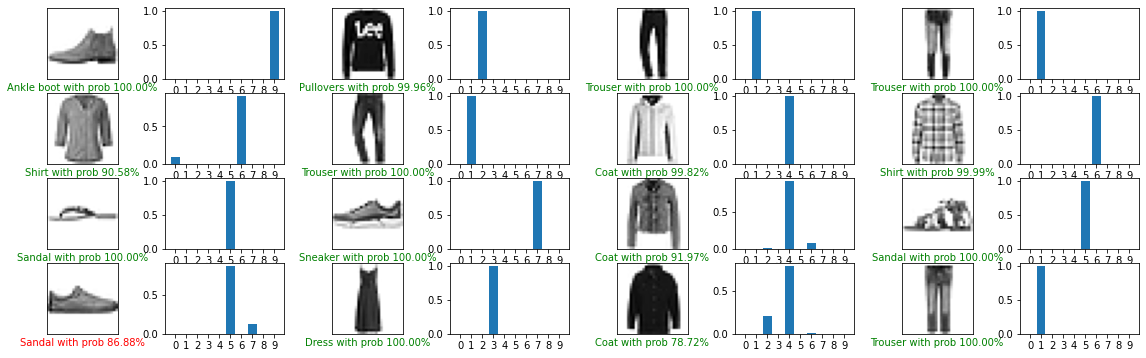

In [ ]:
r = 4
c = 4
n = r*c
plt.figure(figsize=[20,6])
for i in range(n):
  plt.subplot(r, 2*c, 2*i+1)
  plot_image(i, ypred, xtest, ytest)
  plt.subplot(r, 2*c, 2*i+2)
  plot_prob(i, ypred, ytest)